# Pandas and Matplotlib
In this section we'll introduce pandas, and making figures in matplotlib.

To get started with our code we'll import the libraries we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Enable plots to show up in the jupyter notebook
%matplotlib inline

#Increase the number of columns that will display
pd.options.display.max_columns = 50

#Set the size of our plots
phi = (1 + 5 ** 0.5) / 2
plt.rcParams['figure.figsize'] = [10*phi, 10]
#You can also comment in code cells by using "#" to ignore the line. Useful for testing too.

We'll then need to load our file into a pandas "dataframe." Pandas will try to automatically tell what type of data is in each column. We want to preserve the "0" in our API numbers so we'll want them treated like a string rather than a number so we must tell pandas what type of data is in that column the the `dtype` variable.  We'll be using data from the [USGS Core Research Center](https://www.usgs.gov/core-science-systems/nggdp/core-research-center) in Lakewood, CO.

In [2]:
file_path = 'data/cores.csv'
data_types = {'API Num':str}
df = pd.read_csv(file_path, dtype=data_types)
df.shape #(Row count, Columns count)

(16321, 25)

We see that we have 16,321 rows and 25 columns of data. To preview the data lets increase the number of displayed columns and  then we'll use the ```python df.head()```  command.

In [3]:
#Preview our data
df.head()

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,Field,Type,State,County,Photos,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth
0,0.0,NaN,0.0,NaN,0.0,NaN,B197,4235730400,AMOCO PRODUCTION,3 D SELL,ELLIS RANCH,SLABBED,TX,OCHILTREE,T,F,F,36.314700,-100.605060,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,COUNCIL GROVE,PERM,3936.0,4046.0
1,0.0,NaN,0.0,NaN,0.0,NaN,C822,4250132247,PETRO LEWIS CORP,1 HARRISON,JANICE,SLABBED,TX,YOAKUM,F,F,T,33.088144,-102.999843,CENTER OF SECTION,NO SPECIAL RESTRICTIONS,WOLFCAMP,PERM,8915.0,9075.0
2,0.0,NaN,0.0,NaN,0.0,NaN,C823,4250132168,PETRO LEWIS CORP,2 BOWEN,JANICE,SLABBED,TX,YOAKUM,F,F,T,33.073615,-102.999880,CENTER OF SECTION,NO SPECIAL RESTRICTIONS,WOLFCAMP,PERM,8900.0,8961.0
3,0.0,NaN,0.0,NaN,NaN,NaN,C824,4250132345,PETRO LEWIS CORP,1 GENTRY,JANICE,SLABBED,TX,YOAKUM,F,F,T,NaN,NaN,NaN,NO SPECIAL RESTRICTIONS,WOLFCAMP,PERM,8900.0,8958.0
4,0.0,NaN,0.0,NaN,8.0,NaN,C827,NaN,PETRO LEWIS CORP,3-21 PETTY,SW CATARINS,SLABBED,TX,WEBB,F,F,F,NaN,NaN,NaN,NO SPECIAL RESTRICTIONS,SAN MIGUEL,CRET,5242.0,5322.0


We can select data we wish to work with from our dataframe to create a "series."  This can be done with locations in the dataframe or with filters. When counting in Python `0` is the first number you start with. Let's look at the API number (column 7) 2nd row (index 1) using two different methods. 

In [4]:
print(df.at[1,'API Num'])
print(df.iloc[1,7])

4250132247
4250132247


We can also filter to select data. Using one or mutliple criteria.  When we select a portion of a `DataFrame` we return a pandas `Series`.

In [ ]:
df[df['Field'] == 'JANICE']

In [ ]:
df[(df['Field'] == 'JANICE') & 
   (df['Source'] == 'CENTER OF SECTION') & 
   (df['Well Name'] == '1 HARRISON')]

Or we can define the column of data that we want. `Series.tolist()` will format our data into a list.

In [ ]:
df['API Num'][(df['Field']=='JANICE')&(df['Source']=='CENTER OF SECTION')&(df['Well Name']=='1 HARRISON')].tolist()

Now looking at this lets see how many cores are in each state with a loop. `Series.unique()` will return 

In [5]:
states = df['State'][df['State'].notnull()].unique().tolist()
total_count = 0
state_counts = []

#For loop
for state in states:
    #filter to those rows that are from the state in the loop, see the shape, take the row count
    state_count = df[df.State == state].shape[0] 
    state_counts.append(state_count)
    total_count += state_count
    print(state,':',state_count)
    
null_rows = df[df['State'].isnull()].shape[0]
print('Null :', null_rows)
print('Total :', total_count + null_rows)


TX : 53
NJ : 8
OH : 6
AK : 823
KY : 2
NY : 3
MT : 2416
WY : 5846
CO : 2867
OK : 84
NE : 492
KS : 283
UT : 917
CA : 191
SD : 79
NV : 56
WA : 168
IN : 4
ID : 21
NM : 461
LA : 3
AZ : 215
MI : 7
AR : 7
AL : 2
OR : 2
MO : 29
FL : 9
IA : 3
ND : 1220
MN : 1
HI : 1
WV : 3
AS : 2
PA : 4
NC : 17
Null : 16
Total : 16321


Now let's take that same data and graph it with a bar graph in matplotlib.

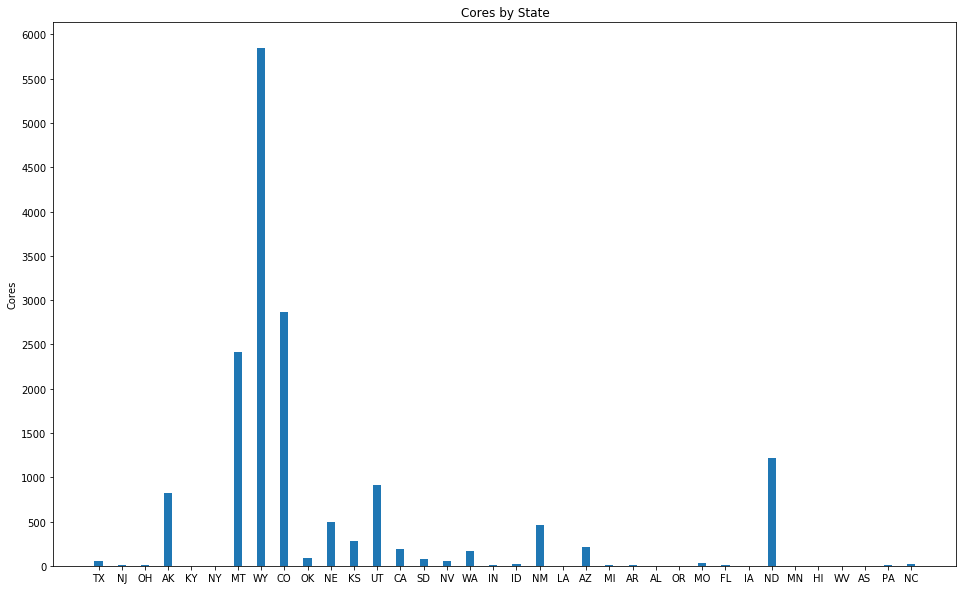

In [6]:
N = len(states)
ind = np.arange(N)
width = 0.35
p1 = plt.bar(ind, state_counts, width)
plt.ylabel('Cores')
plt.title('Cores by State')
plt.xticks(ind, states)
plt.yticks(np.arange(0, 6001, 500))
plt.show()

---

## Example Two: Clay Typing

In this example we will load some spectral gamma data, calculate vclay, and look at the K-Th ratio.


In [7]:
#Load Data & Set DEPT to Index
las_df = pd.read_csv('data/Spectral_GR.csv')
las_df.set_index('DEPT',inplace=True)

#Preview Data
las_df.head()

,GR,GRTO,POTA,THOR,URAN
DEPT,,,,,
565.0,16.0954,12.0780,0.1604,1.4872,1.2015
565.5,13.7402,13.0777,0.1773,1.5470,1.2832
566.0,13.9721,13.7841,0.1870,1.6014,1.3318
566.5,15.1243,12.8703,0.1728,1.4470,1.2563
567.0,14.8489,12.1924,0.1472,1.3372,1.2067


Let's calculate Vshale. First we'll get a clean GR reading from the clean sands around 585' and a GR reading for shale around 4835'.

In [8]:
GRclean = las_df[580:590]['GR'].mean()
GRshale = las_df[4830:4840]['GR'].mean()

Next we'll write a function for Vshale and apply it to our GR to make a new column.

In [10]:
def Vshale(gr,GRclean=GRclean,GRshale=GRshale):
    vshale = (gr - GRclean)/(GRshale-GRclean)
    return vshale

Next we will use `.apply(lambda x: <function>(x))` to calculate a new column.

In [11]:
las_df['VSHALE'] = las_df['GR'].apply(lambda x: Vshale(x))

In [12]:
las_df.head()

,GR,GRTO,POTA,THOR,URAN,VSHALE
DEPT,,,,,,
565.0,16.0954,12.0780,0.1604,1.4872,1.2015,0.058640
565.5,13.7402,13.0777,0.1773,1.5470,1.2832,0.043435
566.0,13.9721,13.7841,0.1870,1.6014,1.3318,0.044932
566.5,15.1243,12.8703,0.1728,1.4470,1.2563,0.052371
567.0,14.8489,12.1924,0.1472,1.3372,1.2067,0.050593


Let's plot the spectral gamma in other plots to give us more information on what type of clays we are dealing with. We can utilize our Vshale calculation to see how different relative volumes of clay change with clay type.

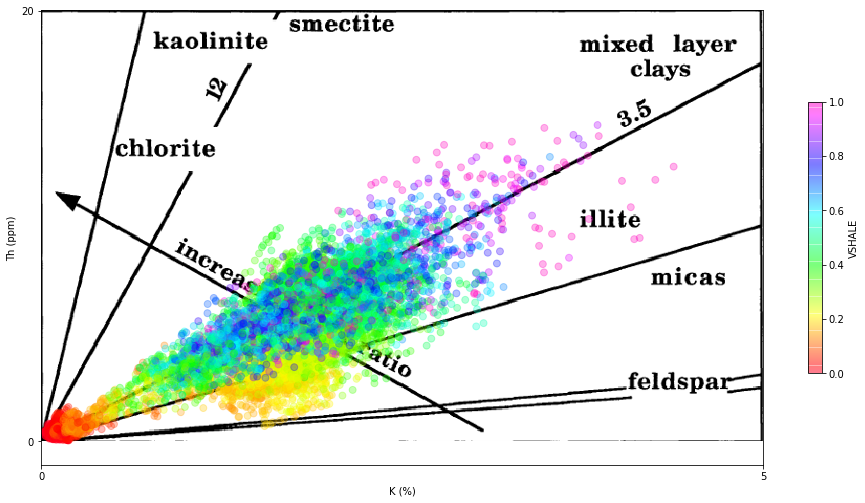

In [13]:
#Background Image
im = plt.imread('img/3_KTHcrossplot_crop.png')
implot = plt.imshow(im)

#Image is 689x411 pixels and 5x20 on scale
colormap = plt.cm.gist_rainbow 
normalize = mpl.colors.Normalize(vmin=0, vmax=1)
plt.scatter(las_df['POTA'].apply(lambda x: x*(689/5)),       #Scale to image size & scale
            las_df['THOR'].apply(lambda x: -x*(411/20)+411), #Scale to image size & scale
            s=48,               #Size of dot
            c=las_df['VSHALE'], #column to use for color scale
            cmap=colormap,      #color map
            norm=normalize,
            alpha=0.3)          #Alpha

#Set Axis Scales
plt.xticks([0,689], [0,5])      #change the x axis
plt.yticks([411,0], [0,20])     #change the y axis

#Set Axis Labels
plt.xlabel('K (%)')             #label x axis
plt.ylabel('Th (ppm)')          #label y axis

#Set Color Bar
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('VSHALE', rotation=90)

#Show Plot
plt.show()

---

## Example Three: Maturity in North Dakota

Lets take another look at some more data from the National Energy Geochemical Survey database. 

SOURCE: https://energy.usgs.gov/GeochemistryGeophysics/GeochemistryLaboratories/GeochemistryLaboratories-GeochemistryDatabase.aspx
        

KEY: https://mrdata.usgs.gov/geochem/about.php

Let's open a text file of the analysis.

In [14]:
chem = pd.read_csv('data/Analysis.txt',
                   dtype={'OrderID':str,'SampleNumber':str,'AnalysisGroup':str,
                          'Matrix':str,'Analysis':str,'Param':str,'Units':str,'Comments':str},
                   encoding = "ISO-8859-1")

Preview your data.

In [15]:
print(chem.shape)
chem.head()

(3138631, 9)


,OrderID,SampleNumber,AnalysisGroup,Matrix,Analysis,Param,Result,Units,Comments
0,80036,80036386,12,Rock,GCFID,PRPH_H_C15+sats,3.00,NaN,NaN
1,80036,80036386,12,Rock,GCFID,C4_223TM,0.20,ppm,NaN
2,80036,80036386,12,Rock,GCFID,C6_MCYC,6.70,ppm,NaN
3,80036,80036386,12,Rock,GCFID,C5_33DM,0.20,ppm,NaN
4,80036,80036386,12,Rock,GCFID,CPI01_H_C15+sats,1.15,NaN,NaN


In [16]:
#scratch delete
gas_comp = chem[chem.Analysis == 'Gas_Comps']#[chem.Matrix == 'Gas'][chem.Param.str.contains('Methane')].unique()

gas_comp['SampleNumber'] = gas_comp['SampleNumber'].astype(str)
samples['SampleNumber'] = samples['SampleNumber'].astype(str)
gas_comp = gas_comp.merge(samples,how='left',on=['OrderID','SampleNumber','Matrix'])
gas_comp.to_csv('C:/Scipts/Scripts/OK/Gas_Comps.csv',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


NameError: name 'samples' is not defined

Let's filter down to only Rock-Eval data by filtering to the contents of a list with `.isin(<list>)`.

In [ ]:
#Make a list of values to filter to only rock-eval day.
parms = ['OI', 'S1', 'S2', 'S3', 'TMAX', 'TOC', 'HI', 'S2S3', 'PI', 'PC']
rockeval = chem[(chem['Analysis']=='Rock-Eval')&(chem['Param'].isin(parms))]
print(rockeval.shape)

Now let open an excel file. We'll then calulate two new columns and merge more information about those samples. 

In [10]:
#Open an excel file to a dataframe
samples = pd.read_excel('data/Samples.xlsx',converters={'API':str})

#Calculate TVD SS
samples['TVDSS_top'] = samples['ELEVF'] - samples['TOPF']
samples['TVDSS_bot'] = samples['ELEVF'] - samples['BOTF']

#Preview the first three rows of the dataframe
samples.head(3)

,OrderID,SampleNumber,FieldID,Matrix,SampleDeliniation,Comments,Latitude,Longitude,Site,WELLN,API,FIELDN,FORMN,AGE,BED,BEDTH,ELEV,ELEVF,TOPDEPTH,TOPF,BOTDEPTH,BOTF,TD,TDF,LITHO1,LITHO2,LITHO3,LITHPCT1,LITHPCT2,LITHPCT3,RANK,SECTR,STATE,COUNTRY,COUNTY,TVDSS_top,TVDSS_bot
0,00003,00003001,103 FEDERAL,Rock,Core,NaN,39.958628,-108.948889,BANTA RIDGE,6-15-1S-,05103087220000,BANTA RIDGE,MANCOS,Coloradoan,NaN,NaN,NaN,5585.0,978.713,3211.0,978.713,3211.0,1062.838,3487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S 1W10315,Colorado,United States,Rio Blanco,2374.0,2374.0
1,00003,00003002,103 FEDERAL,Rock,Core,NaN,39.958628,-108.948889,BANTA RIDGE,6-15-1S-,05103087220000,BANTA RIDGE,MANCOS,Coloradoan,NaN,NaN,NaN,5585.0,1004.926,3297.0,1004.926,3297.0,1062.838,3487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S 1W10315,Colorado,United States,Rio Blanco,2288.0,2288.0
2,00003,00003003,103 FEDERAL,Rock,Core,NaN,39.958628,-108.948889,BANTA RIDGE,6-15-1S-,05103087220000,BANTA RIDGE,MANCOS,Coloradoan,NaN,NaN,NaN,5585.0,1005.535,3299.0,1005.535,3299.0,1062.838,3487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S 1W10315,Colorado,United States,Rio Blanco,2286.0,2286.0


In [ ]:
samples.shape

Lets make sure the data is in the correct format and merge the two dataframes.

In [ ]:
#Set the columns to a string format
rockeval['SampleNumber'] = rockeval['SampleNumber'].astype(str)
samples['SampleNumber'] = samples['SampleNumber'].astype(str)

#Merge the sample location dataframe to the analysis dataframe
rockeval = rockeval.merge(samples,how='left',on=['OrderID','SampleNumber','Matrix'])

In [ ]:
rockeval.head(4)

Notice that Comments columns with the '_x' and '_y'? This occurs when there are the same column name in both the two dataframes in the merge.

Let's check those calculated values and set them to the surface elevation if they are null.

In [ ]:
print(rockeval[rockeval['TVDSS_top'].isnull()].shape)
rockeval['Z'] = rockeval['TVDSS_top'].where(rockeval['TVDSS_top'].notnull(),other=rockeval['ELEVF'])
rockeval['Result'] = rockeval['Result'][rockeval['Result']!='ND']

#Save a copy for later
rockeval.to_csv('data/Rock-Eval.csv',index=False)

Let's take a portion of the pyrolysis data and look at maturity trends in North Dakota.

In [ ]:
#Filter to TMAX data in North Dakota
nd = rockeval[rockeval['STATE']=='North Dakota'][rockeval['Param']=='TMAX']
nullvals = ['ND','NA']
nd = nd[~nd.Result.isin(nullvals)] # "~" means the opposite
nd['Result'] = nd['Result'].astype(float)

#Make a figure with matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #nrows, ncols, and index

#make a list our maturity cutoffs, colors, and labels.
maturity = [(0,430,'saddlebrown','Immature'),
    (435,445,'lime','Early'),
    (445,450,'green','Peak'),
    (450,470,'darkolivegreen','Late'),
    (470,999, 'r','Gas')]

#Populate the figure with a for loop
for low,high,c,label in maturity:
    xs = nd['Longitude'][(nd['Result']>=low)&(nd['Result']<high)]
    ys = nd['Latitude'][(nd['Result']>=low)&(nd['Result']<high)]
    zs = nd['Z'][(nd['Result']>=low)&(nd['Result']<high)]
    ax.scatter(xs, ys, zs, c=c, marker='o')

#Set the legend
ax.legend([x[3] for x in maturity])

#Rotate the figure
ax.view_init(45,260)

plt.show()

---

## Give it a try

Try to reload the already merged rock-eval data, filter to the TOC data, preview your data, describe your data, and make a plot.  I've given you the framework for a scatterplot below.

In [ ]:
#Filter down to TOC analysis

#Use ".describe()" to find out about your resuls


In [ ]:
#Make a scater plot with your results
plt.scatter(toc['Longitude'], toc['Latitude'], c=toc['Result'])
plt.gray()

plt.show()